In [1]:
import os
from pathlib import Path
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
def load_data(filename):
    with open(filename, 'rb') as file:
        return pickle.load(file)

In [3]:
data_root = r"C:/Users/hayashi/doutorado/mac6958--dados-redes/webrtc"


In [4]:
file_path = Path(data_root, 'data/processed/facial-1012-sequential.pkl')

In [5]:
data = load_data(file_path)

In [6]:
X,Y = data

In [7]:
X.shape, Y.shape

((34880, 30, 323), (34880, 5))

'user_id': -1.647508942095828,
'test_condition': 0.4629100498862757,
'delay': 1.0690449676496976,
'jitter': 1.224744871391589,
'packet_loss_rate': 0.0

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [9]:
# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
for i in range(Y_train.shape[1]):
    print(i, np.unique(Y_train[:,i]))

0 [-1.64750894 -1.47408695 -1.30066495 -1.12724296 -0.95382097 -0.78039897
 -0.60697698 -0.43355498 -0.26013299 -0.086711    0.086711    0.26013299
  0.43355498  0.60697698  0.78039897  0.95382097  1.12724296  1.30066495
  1.47408695  1.64750894]
1 [-1.62018517 -1.38873015 -1.15727512 -0.9258201  -0.69436507 -0.46291005
 -0.23145502  0.          0.23145502  0.46291005  0.69436507  0.9258201
  1.15727512  1.38873015  1.62018517]
2 [-1.60356745 -0.26726124  1.06904497]
3 [-0.81649658  1.22474487]
4 [-1.22474487  0.          1.22474487]


In [11]:
for i in range(Y_val.shape[1]):
    print(i, np.unique(Y_val[:,i]))

0 [-1.64750894 -1.47408695 -1.30066495 -1.12724296 -0.95382097 -0.78039897
 -0.60697698 -0.43355498 -0.26013299 -0.086711    0.086711    0.26013299
  0.43355498  0.60697698  0.78039897  0.95382097  1.12724296  1.30066495
  1.47408695  1.64750894]
1 [-1.62018517 -1.38873015 -1.15727512 -0.9258201  -0.69436507 -0.46291005
 -0.23145502  0.          0.23145502  0.46291005  0.69436507  0.9258201
  1.15727512  1.38873015  1.62018517]
2 [-1.60356745 -0.26726124  1.06904497]
3 [-0.81649658  1.22474487]
4 [-1.22474487  0.          1.22474487]


In [16]:
# Build the model
model = Sequential([
    GRU(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    GRU(50, return_sequences=False),
    Dropout(0.2),
    Dense(5)  # Linear activation for regression
])

In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

In [18]:
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 30, 50)              │          56,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,805 (280.49 KB)

 Trainable params: 71,805 (280.49 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(X_train, Y_train, epochs=70, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 1.0791 - mse: 1.0791 - val_loss: 0.9966 - val_mse: 0.9966
Epoch 2/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.0125 - mse: 1.0125 - val_loss: 0.9970 - val_mse: 0.9970
Epoch 3/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.0042 - mse: 1.0042 - val_loss: 0.9980 - val_mse: 0.9980
Epoch 4/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 1.0062 - mse: 1.0062 - val_loss: 0.9968 - val_mse: 0.9968
Epoch 5/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9993 - mse: 0.9993 - val_loss: 0.9984 - val_mse: 0.9984
Epoch 6/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.0008 - mse: 1.0008 - val_loss: 0.9964 - val_mse: 0.9964
Epoch 7/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.0005 - mse: 1.0005 - val_loss: 0.9962 - val_mse: 0.9962
Epoch 8/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.0017 - mse: 1.0017 - val_loss: 0.9960 - val_mse: 0.9960
Epoch 9/70
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/

In [20]:
history_2 = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9763 - mse: 0.9763 - val_loss: 0.9867 - val_mse: 0.9867
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9826 - mse: 0.9826 - val_loss: 0.9768 - val_mse: 0.9768
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9775 - mse: 0.9775 - val_loss: 0.9839 - val_mse: 0.9839
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9793 - mse: 0.9793 - val_loss: 0.9685 - val_mse: 0.9685
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9715 - mse: 0.9715 - val_loss: 0.9710 - val_mse: 0.9710
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9762 - mse: 0.9762 - val_loss: 0.9685 - val_mse: 0.9685
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9745 - mse: 0.9745 - val_loss: 0.9700 - val_mse: 0.9700
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9750 - mse: 0.9750 - val_loss: 0.9726 - val_mse: 0.9726
Epoch 9/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/

In [21]:
history_3 = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9815 - mse: 0.9815 - val_loss: 0.9768 - val_mse: 0.9768
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.9786 - mse: 0.9786 - val_loss: 0.9758 - val_mse: 0.9758
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9818 - mse: 0.9818 - val_loss: 0.9761 - val_mse: 0.9761
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9833 - mse: 0.9833 - val_loss: 0.9770 - val_mse: 0.9770
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9804 - mse: 0.9804 - val_loss: 0.9731 - val_mse: 0.9731
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9792 - mse: 0.9792 - val_loss: 0.9702 - val_mse: 0.9702
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9792 - mse: 0.9792 - val_loss: 0.9754 - val_mse: 0.9754
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9781 - mse: 0.9781 - val_loss: 0.9770 - val_mse: 0.9770
Epoch 9/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/

In [22]:
history_4 = model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9786 - mse: 0.9786 - val_loss: 0.9735 - val_mse: 0.9735
Epoch 2/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9734 - mse: 0.9734 - val_loss: 0.9731 - val_mse: 0.9731
Epoch 3/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9775 - mse: 0.9775 - val_loss: 0.9709 - val_mse: 0.9709
Epoch 4/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9731 - mse: 0.9731 - val_loss: 0.9775 - val_mse: 0.9775
Epoch 5/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9764 - mse: 0.9764 - val_loss: 0.9724 - val_mse: 0.9724
Epoch 6/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9782 - mse: 0.9782 - val_loss: 0.9707 - val_mse: 0.9707
Epoch 7/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9743 - mse: 0.9743 - val_loss: 0.9761 - val_mse: 0.9761
Epoch 8/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.9759 - mse: 0.9759 - val_loss: 0.9716 - val_mse: 0.9716
Epoch 9/50
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/

In [23]:
def append_history(history, new_history):
    for key in history.history.keys():
        history.history[key].extend(new_history.history[key])

In [24]:
append_history(history, history_2)
append_history(history, history_3)
append_history(history, history_4)


In [25]:
# Evaluate the model on the validation set
val_loss, val_mse = model.evaluate(X_val, Y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation MSE: {val_mse}")

218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9744 - mse: 0.9744
Validation Loss: 0.9788349270820618
Validation MSE: 0.9788349270820618


In [26]:
import matplotlib.pyplot as plt

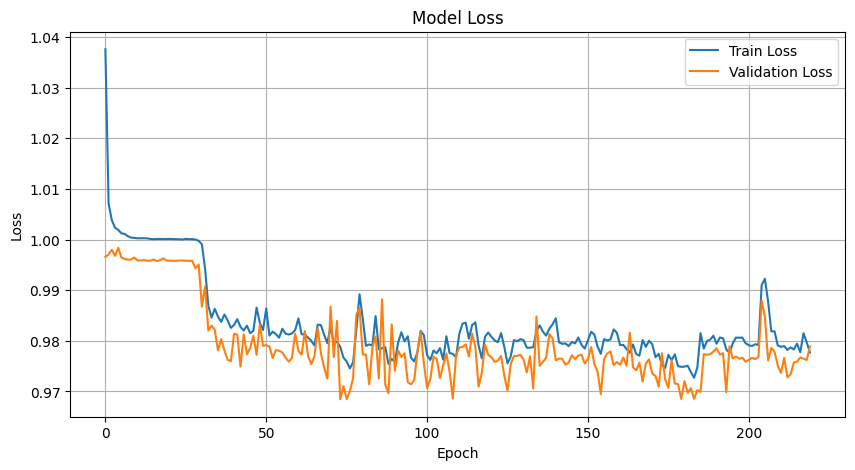

In [27]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()